## Inroduction to Neural Networks
___

### Today's Approach
*Machine learning is taught by academics, for academics.
That’s why most material is so dry and math-heavy.*

*Developers need to know what works and how to use it.
We need less math and more tutorials with working code.*
___
### Anatomy of a Neural Network
Build and Training a Neural Network revolves around the following objects:
- **Layers**, which are combined into a network (or model)
- **Input data** and corresponding **targets**.
- **Loss function**, which defines the feedback signal used for learning
- **Optimizer**, which determines how learning proceeds

![](images/model.png)

#### Layers:
The fundamental data structure in neural networks is the layer. You can think of layers as the LEGO bricks of Deep learning, a metaphor that is made explicit by frameworks like keras. Some of the layers are 
- Dense or Fully connected layers (Dense).
- Convolution layers (Conv2D, Conv1D).
- Recurrent layers (RNN, LSTM, GRU).

In Keras you don't have to care about **compatibility** between the layers because the layers you add to your models are dynamically built to match the shape of the incoming layer.

In [2]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_shape=(28*28,)))

#### Loss Functions and Optimizers

Once the network architecture is defined, you have to choose two major things:
- Loss function (objective function) - The quantity that will be minmized during training. It represents a measure of successs for the task at hand.
- Optimizer - Determines how the network will be updated based on the loss function. It implements a specific variant of stocastic gradient descent(SGD).

Choosing the right objective function for the right problem is extremely important: your network will take any shortcut it can, to minimize the loss; so if the objective doesn’t fully correlate with success for the task at hand, your network will end up doing things you may not have wanted.

Fortunately, when it comes to common problems such as classification, regression, and sequence  prediction, there are simple guidelines you can follow to choose the correct loss. For instance,  you’ll use *binary_crossentropy* for a *two-class classification* problem, *categorical_crossentropy* for a *many-class classification* problem, *mean-squared error* for a *regression problem*, connectionist temporal classification(CTC) for a sequence-learning problem, and so on. 

Note: *Crossentropy* is a quantity from the field of Information Theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.

In [ ]:
## Using optimizer with default settings 
model.compile('rmsprop', 'mse', 
               metrics=['accuracy'])

In [ ]:
## Using optimizer with custom argument values
from keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(),
              loss='mse'.
              metrics = ['accuracy']
             )

### Building your network

You can intuitively understand teh dimensionality of your model as "how much freedom you're allowing the network to have when learning internal representations". Having more hidden units allows the model to learn more-complex representations/functions, but it makes the network more computationally expensive and may lead to learning unwanted patterns.

There are two key architecture decisions to be made about such a stack of Dense layers:
- How many layers to use
- How many hidden units to choose for each layer

All the intermediate layers will use an **Activation Function** like *relu*. Without an activation function, The *Dense* layer would consist of two linear operations - a dot product and an addition.

So the layer could only learn linear transformations of the input data. Such a model is to restricted and wouldn't benefit from multiple layers fo representations, because a deep stack of linear layers would still implement a linear operation: adding more layers wouldn't extend the learning ability of the model.

In order to get access to a much richer network that would benefit from deep representaions, you need a non-linearity or activation function. *relu* is the most popular activation function, but there are many other candidates.

## Regression problem : Predicting house prices 

#### Loading the data

In [3]:
from keras.datasets import boston_housing

In [4]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 7us/step


In [5]:
X_train.shape

(404, 13)

In [8]:
y_train[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [6]:
X_test.shape

(102, 13)

In [10]:
y_test[:10]

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2])

#### Preparing the data (Normalizing)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Building the Model

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile('rmsprop', 'mse', metrics=['mae']) # Mean Absolute Error

In [20]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Train on 404 samples, validate on 102 samples
Epoch 1/20
404/404 [==============================] - 0s 58us/step - loss: 11.4336 - mean_absolute_error: 2.4254 - val_loss: 21.0266 - val_mean_absolute_error: 3.2123
Epoch 2/20
404/404 [==============================] - 0s 68us/step - loss: 11.0175 - mean_absolute_error: 2.3326 - val_loss: 21.0281 - val_mean_absolute_error: 3.1899
Epoch 3/20
404/404 [==============================] - 0s 61us/step - loss: 10.7472 - mean_absolute_error: 2.3183 - val_loss: 21.7213 - val_mean_absolute_error: 3.2007
Epoch 4/20
404/404 [==============================] - 0s 65us/step - loss: 10.6210 - mean_absolute_error: 2.3485 - val_loss: 20.3379 - val_mean_absolute_error: 3.0850
Epoch 5/20
404/404 [==============================] - 0s 70us/step - loss: 10.4255 - mean_absolute_error: 2.2743 - val_loss: 21.4862 - val_mean_absolute_error: 3.1515
Epoch 6/20
404/404 [==============================] - 0s 58us/step - loss: 10.2094 - mean_absolute_error: 2.2631 - val_

In [21]:
model.evaluate(X_test, y_test)

102/102 [==============================] - 0s 45us/step


[22.68811184752221, 3.109004516227573]

## Binary classification problem : Dummy dataset


In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Preparing data

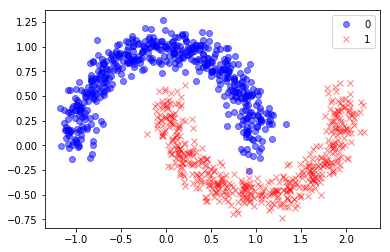

In [45]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [192]:
X.shape

(1000, 2)

In [193]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [202]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [203]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [204]:
model.evaluate(X_test, y_test)

 32/300 [==>...........................] - ETA: 3s

[0.010121442064022025, 0.9933333333333333]

In [205]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [206]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

 32/300 [==>...........................] - ETA: 0sThe Accuracy score on the Train set is:	0.997
The Accuracy score on the Test set is:	0.993


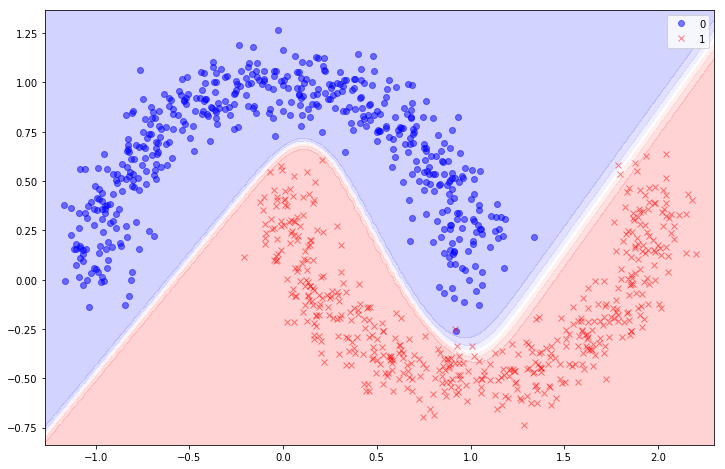

In [207]:
plot_decision_boundary(model, X, y)

## Multiclass classification Problem : MNIST dataset

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [83]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

In [84]:
X_train.shape

(60000, 28, 28)

In [85]:
X_test.shape

(10000, 28, 28)

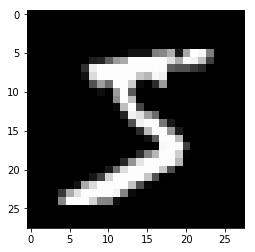

In [7]:
plt.imshow(X_train[0], cmap='gray')

In [86]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [9]:
X_train.shape

(60000, 784)

In [87]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [12]:
from keras.utils.np_utils import to_categorical

In [88]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [14]:
y_train[0]

5

In [15]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [16]:
y_train_cat.shape

(60000, 10)

In [17]:
y_test_cat.shape

(10000, 10)

### Fully connected on images

In [18]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [19]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 8s - loss: 0.3301 - acc: 0.8975 - val_loss: 0.1983 - val_acc: 0.9376
Epoch 2/10
42000/42000 [==============================] - 7s - loss: 0.1139 - acc: 0.9654 - val_loss: 0.1159 - val_acc: 0.9652
Epoch 3/10
42000/42000 [==============================] - 8s - loss: 0.0730 - acc: 0.9773 - val_loss: 0.1593 - val_acc: 0.9575
Epoch 4/10
42000/42000 [==============================] - 8s - loss: 0.0522 - acc: 0.9842 - val_loss: 0.1028 - val_acc: 0.9727
Epoch 5/10
42000/42000 [==============================] - 7s - loss: 0.0398 - acc: 0.9876 - val_loss: 0.1318 - val_acc: 0.9667
Epoch 6/10
42000/42000 [==============================] - 7s - loss: 0.0313 - acc: 0.9907 - val_loss: 0.1672 - val_acc: 0.9537
Epoch 7/10
42000/42000 [==============================] - 7s - loss: 0.0249 - acc: 0.9926 - val_loss: 0.1220 - val_acc: 0.9739
Epoch 8/10
42000/42000 [==============================] - 7s 

Text(0.5, 0, 'Epochs')

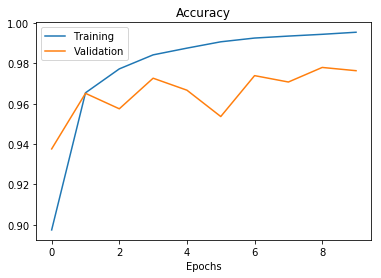

In [20]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [21]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy

 9888/10000 [============================>.] - ETA: 0s

0.9789